# Analysis on UCI Wine Dataset

Here I have imported Wine dataset from UCI repo. This dataset contains 13 features with 178 examples.

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from math import floor, ceil # for rounding up and down

# reading in all data into a NumPy array
all_data = np.loadtxt(open("wine.data","r"),
        delimiter=",",
        skiprows=0,
        dtype=np.float64
        )

# load class labels from column 1
y_wine = all_data[:,0]

# conversion of the class labels to integer-type array
y_wine = y_wine.astype(np.int64, copy=False)

# load the 14 features
X_wine = all_data[:,1:]

# printing some general information about the data
print('\ntotal number of samples (rows):', X_wine.shape[0])
print('total number of features (columns):', X_wine.shape[1])

# printing the 1st wine sample
float_formatter = lambda x: '{:.2f}'.format(x)
np.set_printoptions(formatter={'float_kind':float_formatter})
print('\n1st sample (i.e., 1st row):\nClass label: {:d}\n{:}\n'
          .format(int(y_wine[0]), X_wine[0]))

# printing the rel.frequency of the class labels
print('Class label frequencies')
print('Class 1 samples: {:.2%}'.format(list(y_wine).count(1)/y_wine.shape[0]))
print('Class 2 samples: {:.2%}'.format(list(y_wine).count(2)/y_wine.shape[0]))
print('Class 3 samples: {:.2%}'.format(list(y_wine).count(3)/y_wine.shape[0]))


total number of samples (rows): 178
total number of features (columns): 13

1st sample (i.e., 1st row):
Class label: 1
[14.23 1.71 2.43 15.60 127.00 2.80 3.06 0.28 2.29 5.64 1.04 3.92 1065.00]

Class label frequencies
Class 1 samples: 33.15%
Class 2 samples: 39.89%
Class 3 samples: 26.97%


## Histogram Visualization

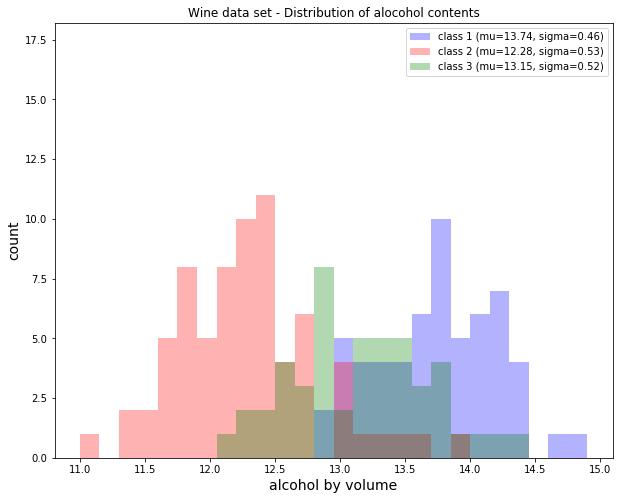

In [6]:
plt.figure(figsize=(10,8))

# bin width of the histogram in steps of 0.15
bins = np.arange(floor(min(X_wine[:,0])), ceil(max(X_wine[:,0])), 0.15)

# get the max count for a particular bin for all classes combined
max_bin = max(np.histogram(X_wine[:,0], bins=bins)[0])

# the order of the colors for each histogram
colors = ('blue', 'red', 'green')

for label,color in zip(range(1,4), colors):
    mean = np.mean(X_wine[:,0][y_wine == label]) # class sample mean
    stdev = np.std(X_wine[:,0][y_wine == label]) # class standard deviation
    plt.hist(X_wine[:,0][y_wine == label],
             bins=bins,
             alpha=0.3, # opacity level
             label='class {} (mu={:.2f}, sigma={:.2f})'.format(label, mean, stdev),
             color=color)

plt.ylim([0, max_bin*1.3])
plt.title('Wine data set - Distribution of alocohol contents')
plt.xlabel('alcohol by volume', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.legend(loc='upper right')

plt.show()

## Scatterplot visualization

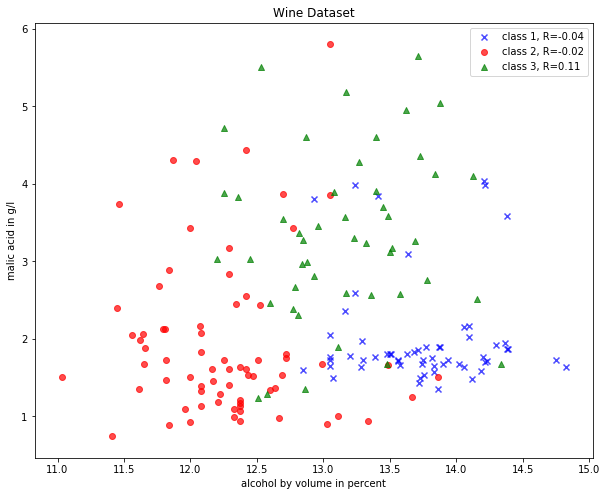

In [7]:
from scipy.stats import pearsonr

plt.figure(figsize=(10,8))

for label,marker,color in zip(
        range(1,4),('x', 'o', '^'),('blue', 'red', 'green')):

    # Calculate Pearson correlation coefficient
    R = pearsonr(X_wine[:,0][y_wine == label], X_wine[:,1][y_wine == label])
    plt.scatter(x=X_wine[:,0][y_wine == label], # x-axis: feat. from col. 1
                y=X_wine[:,1][y_wine == label], # y-axis: feat. from col. 2
                marker=marker, # data point symbol for the scatter plot
                color=color,
                alpha=0.7,
                label='class {:}, R={:.2f}'.format(label, R[0]) # label for the legend
                )

plt.title('Wine Dataset')
plt.xlabel('alcohol by volume in percent')
plt.ylabel('malic acid in g/l')
plt.legend(loc='upper right')

plt.show()

## Splitting the dataset into Training and Test set with the ratios of 70:30.

In [8]:
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing

X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine,
     test_size=0.30, random_state=123)

/usr/local/lib/python3.4/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Distribution of Training and Test Datasets

In [9]:
print('Class label frequencies')

print('\nTraining Dataset:')    
for l in range(1,4):
    print('Class {:} samples: {:.2%}'.format(l, list(y_train).count(l)/y_train.shape[0]))

print('\nTest Dataset:')     
for l in range(1,4):
    print('Class {:} samples: {:.2%}'.format(l, list(y_test).count(l)/y_test.shape[0]))

Class label frequencies

Training Dataset:
Class 1 samples: 36.29%
Class 2 samples: 42.74%
Class 3 samples: 20.97%

Test Dataset:
Class 1 samples: 25.93%
Class 2 samples: 33.33%
Class 3 samples: 40.74%


## Feature Scaling

In [10]:
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

## LDA

Here I have tested my dataset using LDA (Linear Discriminant Analysis). Here I have taken random 3-fold cross validation to train the hyperparameters. Finally it shows an accuracy of 98.3%.

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from matplotlib import colors
from sklearn import cross_validation
# %% Read data from csv file
A = np.loadtxt('wine.data', delimiter=',')
#Get the targets (first column of file)
y = A[:, 0]
#Remove targets from input data
A = A[:, 1:]

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(A, y)
drA = lda.transform(A)

# %% Data extracted; perform LDA
lda = LinearDiscriminantAnalysis()
k_fold = cross_validation.KFold(len(A), 3, shuffle=True)
print('LDA Results: ')
for (trn, tst) in k_fold:
    lda.fit(A[trn], y[trn])
    outVal = lda.score(A[tst], y[tst])
    #Compute classification error
print('Score: ' + str(outVal))

LDA Results: 
Score: 0.983050847458
